In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("/content/data/car_data.csv")
print ("Data Loaded Successfully")
data.head(10)

Data Loaded Successfully


,Horsepower,Weight,Engine_Size,Price
0,130,3504,2.5,20000
1,165,3693,3.0,25000
2,150,3436,2.8,23000
3,140,3449,2.2,21000
4,198,4341,3.8,32000
5,220,4354,4.0,35000
6,215,4732,4.5,37000
7,225,4380,4.6,39000
8,190,3850,3.3,31000
9,170,3560,2.9,27000


In [5]:
X =data[['Horsepower','Weight','Engine_Size']].values
y =data['Price'].values
X =tf.constant(X,dtype=tf.float32)
y =tf.constant(y,dtype=tf.float32)
print('Feature Tensor Shape: ',X.shape)
print ('Label Tensor Shape: ',y.shape)

Feature Tensor Shape:  (10, 3)
Label Tensor Shape:  (10,)


In [26]:
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu'),
                           tf.keras.layers.Dense(8,activation='relu'),
                           tf.keras.layers.Dense(1)]) #Dense - layer fully connected with each other
model.compile(optimizer='adam', loss='mae', metrics=['mae']) #mae - mean absolute error
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X,y,epochs=200,verbose=0)

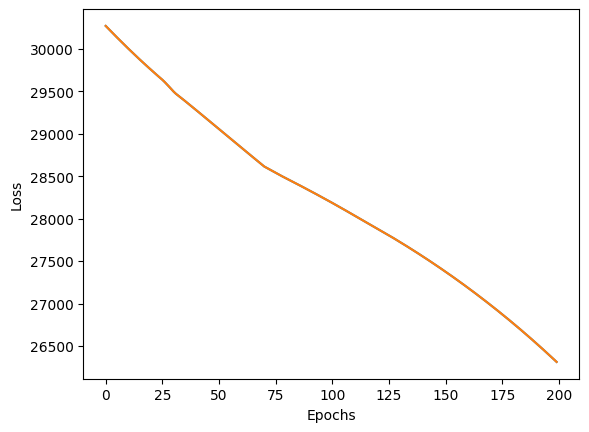

In [29]:
plt.plot(history.history['loss'],label='Loss (MSE)')
plt.plot(history.history['mae'],label='MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [31]:
test_sample=np.array([[160,3550,2.5]])
prediction=model.predict(test_sample)
print('Predicted Price: ',prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Price:  2449.647
